<h1 align="center"> Heat Maps using Matplotlib and Seaborn</h1>

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
helix = pd.read_csv('Data/helix_parameters.csv')
helix.head() # just seeing that data was imported properly by outputing first 5 cells

,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,...,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [3]:
# shape of the dataframe
helix.shape

(47475, 27)

In [4]:
# checking what the columns are
helix.columns

Index([u'job_n', u'Energy', u'n_helices', u'r0_A', u'r0_B', u'r0_C', u'omega0',
       u'delta_omega0_A', u'delta_omega0_B', u'delta_omega0_C', u'z0_offset_A',
       u'z0_offset_B', u'z0_offset_C', u'helix1 phase', u'helix 2 phase',
       u'helix3 phase', u'invert_A', u'invert_B', u'invert_C', u'z1_offset_A',
       u'z1_offset_B', u'z1_offset_C', u'delta_t_A', u'delta_t_B',
       u'delta_t_C', u'omega1', u'z1'],
      dtype='object')

<h3 align='Left'>Selecting Columns (by different methods)</h3>

In [5]:
# selecting a couple columns
couple_columns = helix[['Energy','helix 2 phase', 'helix1 phase']]
couple_columns.head()

,Energy,helix 2 phase,helix1 phase
0,-387.167,0,0
1,-402.606,0,0
2,-395.944,0,0
3,-389.788,0,0
4,-388.016,0,0


In [6]:
# selecting same columns a different way
helix.ix[:,['Energy','helix 2 phase', 'helix1 phase']].head()

,Energy,helix 2 phase,helix1 phase
0,-387.167,0,0
1,-402.606,0,0
2,-395.944,0,0
3,-389.788,0,0
4,-388.016,0,0


<h3 align='Left'>Heat Map</h3>

In [7]:
# this is essentially would be taking the average of each unique combination. 
# one important mention is notice how little the data varies from eachother.
phase_1_2 = couple_columns.groupby(['helix1 phase', 'helix 2 phase']).mean()
print phase_1_2.shape
phase_1_2.head(10)

(100, 1)


Energy
helix1 phase helix 2 phase            
0            0             -392.419841
             20            -389.622691
             40            -390.318620
             60            -392.198537
             80            -393.661624
             100           -392.226253
             120           -390.955112
             140           -394.319969
             160           -392.594862
             180           -389.254009

In [8]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,helix1 phase,helix 2 phase,Energy
0,0,0,-392.419841
1,0,20,-389.622691
2,0,40,-390.318620
3,0,60,-392.198537
4,0,80,-393.661624


<h3 align='Left'>Heat Map using Matplotlib</h3>

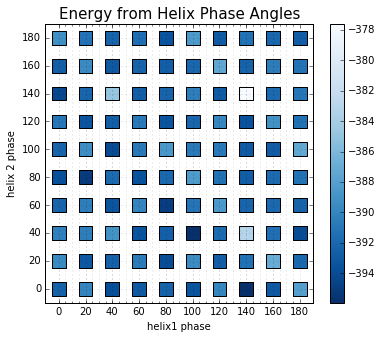

In [9]:
major_ticks = np.arange(0, 200, 20)                                              
minor_ticks = np.arange(0, 180, 5)  

fig = plt.figure(figsize = (6,5))  
ax = fig.add_subplot(1,1,1) 
s = ax.scatter('helix1 phase', 'helix 2 phase', c = 'Energy',data = phase_1_2, cmap = 'Blues_r', marker = 's',s = 190)
ax.axis([phase_1_2['helix1 phase'].min()-10, phase_1_2['helix1 phase'].max()+10, phase_1_2['helix 2 phase'].min()-10, phase_1_2['helix 2 phase'].max()+10])
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                                                                                                                      
ax.grid(which='both', alpha = 0.3)                                                                                                           
ax.grid(which='major', alpha=0.3) 
ax.set_xlabel('helix1 phase', fontsize=10);
ax.set_ylabel('helix 2 phase', fontsize=10);
ax.set_title('Energy from Helix Phase Angles', size = 15)

# http://stackoverflow.com/questions/13943217/how-to-add-colorbars-to-scatterplots-created-like-this
cbar = plt.colorbar(mappable = s,ax = ax)

plt.show()

<h3 align='Left'>Heat Map using Seaborn</h3>

In [10]:
import numpy as np;
import seaborn as sns; 

# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# string 3 is values 'Energy'
# Official pivot documentation
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

phase_1_2.pivot('helix1 phase', 'helix 2 phase','Energy').head()

helix 2 phase,0,20,40,60,80,100,120,140,160,180
helix1 phase,,,,,,,,,,
0,-392.419841,-389.622691,-390.318620,-392.198537,-393.661624,-392.226253,-390.955112,-394.319969,-392.594862,-389.254009
20,-390.013375,-393.121438,-390.435441,-390.489424,-395.112815,-389.307695,-393.365839,-392.171938,-389.534864,-391.171958
40,-393.751152,-392.486692,-388.967952,-393.297131,-391.750444,-394.077600,-392.610059,-384.873483,-393.059775,-392.283178
60,-392.960539,-390.578310,-393.441091,-390.007804,-393.577453,-390.840711,-390.734280,-392.706732,-392.278805,-391.558888
80,-392.347250,-393.919370,-392.575410,-394.918433,-391.945480,-388.600299,-393.314092,-392.258363,-392.636642,-393.471684


In [11]:
# To translate into Excel Terms for those familiar with Excel
# string 1 is row labels 'helix1 phase'
# string 2 is column labels 'helix 2 phase'
# ['Energy'] is values
phase_1_2.pivot('helix1 phase', 'helix 2 phase')['Energy'].head()

helix 2 phase,0,20,40,60,80,100,120,140,160,180
helix1 phase,,,,,,,,,,
0,-392.419841,-389.622691,-390.318620,-392.198537,-393.661624,-392.226253,-390.955112,-394.319969,-392.594862,-389.254009
20,-390.013375,-393.121438,-390.435441,-390.489424,-395.112815,-389.307695,-393.365839,-392.171938,-389.534864,-391.171958
40,-393.751152,-392.486692,-388.967952,-393.297131,-391.750444,-394.077600,-392.610059,-384.873483,-393.059775,-392.283178
60,-392.960539,-390.578310,-393.441091,-390.007804,-393.577453,-390.840711,-390.734280,-392.706732,-392.278805,-391.558888
80,-392.347250,-393.919370,-392.575410,-394.918433,-391.945480,-388.600299,-393.314092,-392.258363,-392.636642,-393.471684


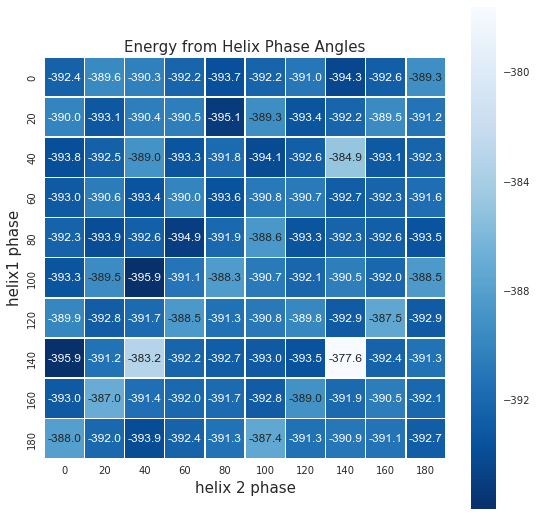

In [12]:
# seaborn heatmap documentation
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html

# cmap choices: http://matplotlib.org/users/colormaps.html
plt.figure(figsize=(9,9))
pivot_table = phase_1_2.pivot('helix1 phase', 'helix 2 phase','Energy')
plt.xlabel('helix 2 phase', size = 15)
plt.ylabel('helix1 phase', size = 15)
plt.title('Energy from Helix Phase Angles', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');